# Dacon Covid 데이터 분석 3주차

## kaggle에 존재하는 외부 데이터 사용해 분석

- 한국뿐만 아니라 세계국가 데이터 존재
- 필요시 한국 데이터만 추출해 사용
- 한국과 다른 나라들간의 상황 비교분석

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/covid-19-all.csv")

In [3]:
# 데이터 행,열 개수 확인
data.shape

(74352, 8)

In [4]:
# 데이터 타입 구성 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74352 entries, 0 to 74351
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  74352 non-null  object 
 1   Province/State  67247 non-null  object 
 2   Latitude        74351 non-null  float64
 3   Longitude       74351 non-null  float64
 4   Confirmed       74333 non-null  float64
 5   Recovered       73964 non-null  float64
 6   Deaths          73911 non-null  float64
 7   Date            74352 non-null  object 
dtypes: float64(5), object(3)
memory usage: 4.5+ MB


In [5]:
# 데이터 기술통계량 보기(위도, 경도 제외)
data[['Confirmed','Recovered','Deaths']].describe()

# 3분위수와 최댓값 격차가 매우 큰걸 보면 코로나 확산이 급작스럽게 증가했지 않을까 추론해본다.

,Confirmed,Recovered,Deaths
count,74333.000000,73964.000000,73911.000000
mean,367.382508,90.369126,18.834720
std,4334.365424,1725.061550,365.755142
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000
75%,28.000000,0.000000,1.000000
max,166831.000000,64281.000000,19899.000000


In [6]:
# 객체 타입의 기술통계량 보기
data.describe(include=object)

,Country/Region,Province/State,Date
count,74352,67247,74352
unique,212,298,82
top,US,Texas,2020-03-30
freq,62707,4381,3439


In [7]:
# 국가별로 얼마나 데이터가 존재하는지 관찰
data['Country/Region'].value_counts()

US                     62707
China                   2606
Canada                   562
Australia                492
France                   345
                       ...  
Saint Martin               1
Taipei and environs        1
North Ireland              1
St. Martin                 1
Cape Verde                 1
Name: Country/Region, Length: 212, dtype: int64

In [8]:
# 한국이 있는지 조회해 보기
data['Country/Region'].unique()

# 두번째 줄에 'South Korea' 존재

array(['China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan', 'Thailand',
       'South Korea', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam',
       'Australia', 'Mexico', 'Brazil', 'Colombia', 'France', 'Nepal',
       'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany',
       'Finland', 'United Arab Emirates', 'India', 'Italy',
       'United Kingdom', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others',
       'Egypt', 'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Austria', 'Algeria',
       'Croatia', 'Switzerland', 'Pakistan', 'Georgia', 'Greece',
       'North Macedonia', 'Norway', 'Romania', 'Denmark', 'Estonia',
       'Netherlands', 'San Marino', 'Azerbaijan', 'Belarus', 'Iceland',
       'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland', 'Ireland',
       'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia', 'Morocco'

In [9]:
# South Korea에 대한 데이터 얼마나 존재하는지 보기
data[data['Country/Region'] == 'South Korea']

# 82개만 존재

,Country/Region,Province/State,Latitude,Longitude,Confirmed,Recovered,Deaths,Date
37,South Korea,NaN,36.000000,128.000000,1.0,NaN,NaN,2020-01-22
75,South Korea,NaN,36.000000,128.000000,1.0,NaN,NaN,2020-01-23
121,South Korea,NaN,36.000000,128.000000,2.0,NaN,NaN,2020-01-24
162,South Korea,NaN,36.000000,128.000000,2.0,NaN,NaN,2020-01-25
208,South Korea,NaN,36.000000,128.000000,3.0,NaN,NaN,2020-01-26
...,...,...,...,...,...,...,...,...
62451,South Korea,NaN,35.907757,127.766922,10384.0,6776.0,200.0,2020-04-08
65362,South Korea,NaN,35.907757,127.766922,10423.0,6973.0,204.0,2020-04-09
68302,South Korea,NaN,35.907757,127.766922,10450.0,7117.0,208.0,2020-04-10
71268,South Korea,NaN,35.907757,127.766922,10480.0,7243.0,211.0,2020-04-11


In [10]:
# 결측치있는 칼럼 결측치 대체하기

data.isnull().sum()

Country/Region       0
Province/State    7105
Latitude             1
Longitude            1
Confirmed           19
Recovered          388
Deaths             441
Date                 0
dtype: int64

In [11]:
# Confirmed/ Recovered/ Deaths 결측치 0으로대체
data['Confirmed'] = data['Confirmed'].fillna(0)
data['Recovered'] = data['Recovered'].fillna(0)
data['Deaths'] = data['Deaths'].fillna(0)
data.head()

,Country/Region,Province/State,Latitude,Longitude,Confirmed,Recovered,Deaths,Date
0,China,Anhui,31.8257,117.2264,1.0,0.0,0.0,2020-01-22
1,China,Beijing,40.1824,116.4142,14.0,0.0,0.0,2020-01-22
2,China,Chongqing,30.0572,107.8740,6.0,0.0,0.0,2020-01-22
3,China,Fujian,26.0789,117.9874,1.0,0.0,0.0,2020-01-22
4,China,Gansu,37.8099,101.0583,0.0,0.0,0.0,2020-01-22


In [12]:
data.columns = ['국가','시도','위도','경도','확진자누적수','완치자누적수','사망자누적수','날짜']
data.head()

,국가,시도,위도,경도,확진자누적수,완치자누적수,사망자누적수,날짜
0,China,Anhui,31.8257,117.2264,1.0,0.0,0.0,2020-01-22
1,China,Beijing,40.1824,116.4142,14.0,0.0,0.0,2020-01-22
2,China,Chongqing,30.0572,107.8740,6.0,0.0,0.0,2020-01-22
3,China,Fujian,26.0789,117.9874,1.0,0.0,0.0,2020-01-22
4,China,Gansu,37.8099,101.0583,0.0,0.0,0.0,2020-01-22


In [13]:
# 세계적 비교이기 때문에 결측치가 많은 시도 칼럼 제거
data = data.drop(['시도'], axis=1).copy()
data.head()

,국가,위도,경도,확진자누적수,완치자누적수,사망자누적수,날짜
0,China,31.8257,117.2264,1.0,0.0,0.0,2020-01-22
1,China,40.1824,116.4142,14.0,0.0,0.0,2020-01-22
2,China,30.0572,107.8740,6.0,0.0,0.0,2020-01-22
3,China,26.0789,117.9874,1.0,0.0,0.0,2020-01-22
4,China,37.8099,101.0583,0.0,0.0,0.0,2020-01-22


In [14]:
# 국가, 위도,경도별로 확진자 누적수 최댓값 데이터프레임 만들기
df_country = pd.DataFrame(data.groupby(['국가','위도','경도'])['확진자누적수'].max())
df_country = df_country.reset_index()
df_country

,국가,위도,경도,확진자누적수
0,Afghanistan,33.000000,65.000000,7.0
1,Afghanistan,33.939100,67.710000,24.0
2,Afghanistan,33.939110,67.709953,607.0
3,Albania,41.153300,20.168300,446.0
4,Algeria,28.033900,1.659600,1914.0
...,...,...,...,...
4180,Zambia,-13.133900,27.849300,2.0
4181,Zambia,-13.133897,27.849332,43.0
4182,Zimbabwe,-20.000000,30.000000,1.0
4183,Zimbabwe,-19.015438,29.154857,14.0


In [15]:
import folium

In [16]:
lat = data['위도'].mean()
long = data['경도'].mean()

In [17]:
m = folium.Map([lat,long], zoom_start=1)
df_country['확진자누적수'] = df_country['확진자누적수'].astype(int)
df_country['확진자누적수'] = df_country['확진자누적수'].astype(str)
from folium.plugins import MarkerCluster
mark_cluster = MarkerCluster().add_to(m)
for i in df_country.index:
    sub_lat = df_country.loc[i, '위도']
    sub_long = df_country.loc[i, '경도']
    tooltip = df_country.loc[i, '국가']+"의 확진자 수:"+df_country.loc[i, '확진자누적수']
    
    folium.Marker(location=[sub_lat, sub_long],
                 tooltip=tooltip).add_to(mark_cluster)
    
m.save("encoding.html")
m

In [25]:
# 중국에 확진자 수도 많이 없는 걸로 보아 데이터의 신뢰도가 높지 않다...

## SearhTrend(검색어 동향), 서울 유동인구 데이터를 활용해 분석

In [90]:
trend = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/SearchTrend.csv")
seoul_floating = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/SeoulFloating.csv")
timeprovince = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/TimeProvince3.csv")

### trend 데이터의 검색엔진 기준은 "NAVER(네이버)" 기준 입니다.

In [91]:
# trend 데이터 EDA
trend.head()

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


In [92]:
trend.tail()

,date,cold,flu,pneumonia,coronavirus
1559,2020-04-08,0.20463,0.04999,0.13172,5.67010
1560,2020-04-09,0.17290,0.04672,0.13463,5.61237
1561,2020-04-10,0.18881,0.04263,0.11526,6.25490
1562,2020-04-11,0.20763,0.07472,0.09336,5.82991
1563,2020-04-12,0.19608,0.03545,0.10054,5.00848


In [93]:
trend.shape

(1564, 5)

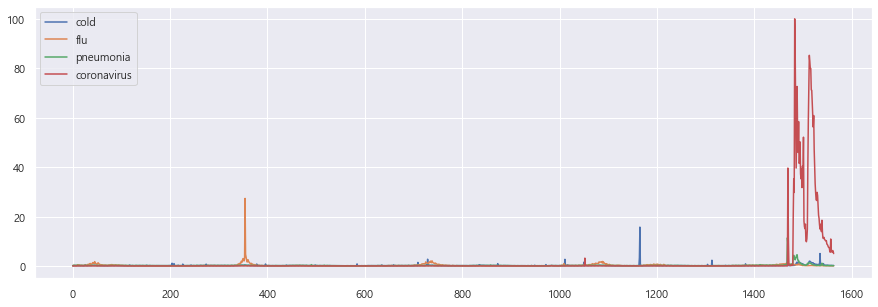

In [94]:
# matplotlib으로 시각화
# 날짜가 지남에 따라 검색 키워드 갯수 변화율
trend.plot(figsize=(15,5))

In [95]:
# seaborn 쓰기 위해서 multiindex를 만들어주기 위해서 index 재설정
trend = trend.set_index('date')
trend.head()

,cold,flu,pneumonia,coronavirus
date,,,,
2016-01-01,0.11663,0.05590,0.15726,0.00736
2016-01-02,0.13372,0.17135,0.20826,0.00890
2016-01-03,0.14917,0.22317,0.19326,0.00845
2016-01-04,0.17463,0.18626,0.29008,0.01145
2016-01-05,0.17226,0.15072,0.24562,0.01381


In [96]:
df_trend = pd.DataFrame(trend.stack())
df_trend.head()

0
date                           
2016-01-01 cold         0.11663
           flu          0.05590
           pneumonia    0.15726
           coronavirus  0.00736
2016-01-02 cold         0.13372

In [97]:
df_trend = df_trend.reset_index()

In [98]:
df_trend.head()

,date,level_1,0
0,2016-01-01,cold,0.11663
1,2016-01-01,flu,0.05590
2,2016-01-01,pneumonia,0.15726
3,2016-01-01,coronavirus,0.00736
4,2016-01-02,cold,0.13372


In [99]:
df_trend.columns = ['날짜','키워드','검색횟수']

In [100]:
df_trend.head()

,날짜,키워드,검색횟수
0,2016-01-01,cold,0.11663
1,2016-01-01,flu,0.05590
2,2016-01-01,pneumonia,0.15726
3,2016-01-01,coronavirus,0.00736
4,2016-01-02,cold,0.13372


In [101]:
df_trend.shape

(6256, 3)

In [102]:
# 검색횟수가 
df_trend['검색횟수'] = round(df_trend['검색횟수'].mul(1000))
df_trend['검색횟수'] = df_trend['검색횟수'].astype(int)
df_trend.head()

,날짜,키워드,검색횟수
0,2016-01-01,cold,117
1,2016-01-01,flu,56
2,2016-01-01,pneumonia,157
3,2016-01-01,coronavirus,7
4,2016-01-02,cold,134


In [103]:
df_trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6256 entries, 0 to 6255
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      6256 non-null   object
 1   키워드     6256 non-null   object
 2   검색횟수    6256 non-null   int32 
dtypes: int32(1), object(2)
memory usage: 122.3+ KB


In [104]:
# 날짜 칼럼 데이터 타입 datetime으로 바꿔주기
df_trend['날짜'] = pd.to_datetime(df_trend['날짜'])

In [105]:
# timeprovince 데이터 날짜 기준으로 df_trend 데이터프레임에서 일부 추출
timeprovince.head()

#2020년 1월 20일부터

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


In [106]:
# 2020년 1월 20일 ~ 2020년 4월 12일 데이터만 추출
df_trend_1 = df_trend.loc[df_trend['날짜'].isin(pd.date_range(start='01/20/2020', end='04/12/2020'))].copy()
df_trend_1.head()

,날짜,키워드,검색횟수
5920,2020-01-20,cold,192
5921,2020-01-20,flu,703
5922,2020-01-20,pneumonia,3637
5923,2020-01-20,coronavirus,20696
5924,2020-01-21,cold,225


In [107]:
import matplotlib.pyplot as plt

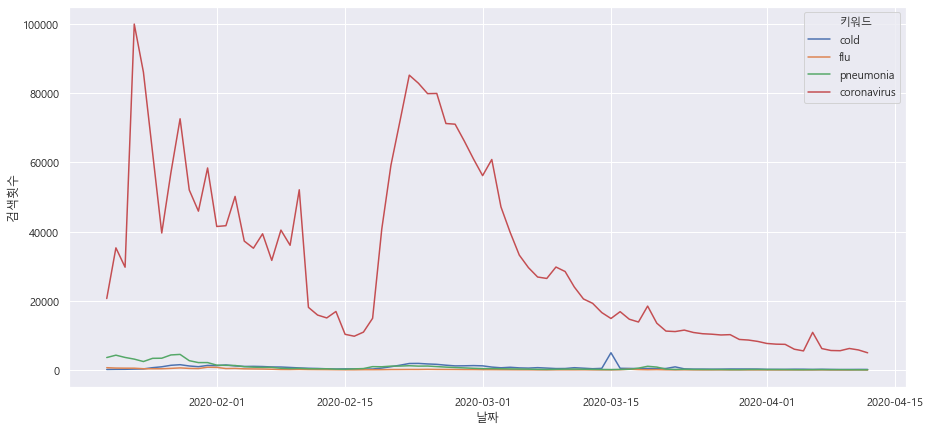

In [108]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df_trend_1, x='날짜',y='검색횟수',hue='키워드', ci=None)

In [112]:
# 2020년 1월 20일부터 코로나바이러스의 검색횟수는 다른 키워드보다 현저히 높았다
# 그렇다면 날짜범위를 6개월 이전으로 더 늘려 시각화해보자
df_trend_2 = df_trend.loc[df_trend['날짜'].isin(pd.date_range(start='07/20/2019', end='04/12/2020'))].copy()
df_trend_2.head()

,날짜,키워드,검색횟수
5184,2019-07-20,cold,63
5185,2019-07-20,flu,22
5186,2019-07-20,pneumonia,94
5187,2019-07-20,coronavirus,4
5188,2019-07-21,cold,58


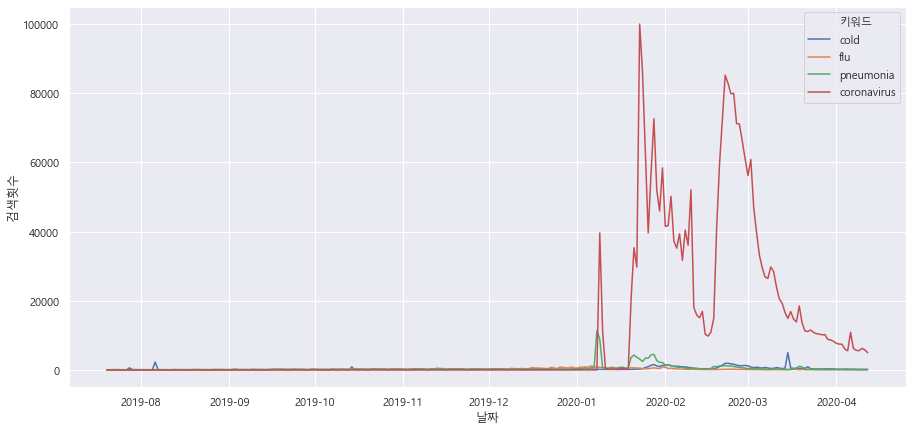

In [113]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df_trend_2, x='날짜', y='검색횟수', hue='키워드')

# 2020년 1월 20일에 한국에 첫 확진자가 발생하였지만 이전에 1월 초부터 코로나 바이러스에 대한 검색 횟수가 이미 증가했었다.

In [ ]:
# 서울 유동인구 데이터 이용해보기!